In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

import cv2, os

In [0]:
# from PIL import Image
# # load the image
# image = Image.open('drive/My Drive/dataset_coffee/dataset_percobaan1/kelas_1/DSCF0903.JPG')
# # summarize some details about the image
# print(image.format)
# print(image.mode)
# print(image.size)
# # show the image
# image.show()

In [0]:
header = ['no', 'id', 'iso', 'class','label']

from google.colab import files
uploaded = files.upload()

Saving dasetallclass.csv to dasetallclass (1).csv


In [0]:
import io
dtLabel = pd.read_csv(io.BytesIO(uploaded['dasetallclass.csv']))

#dataset is now stored in a pandas dataframe
dtLabel

,no,id,iso,class,label
0,1,DSCF0903.JPG,400,specialty,1
1,2,DSCF0900.JPG,800,specialty,1
2,3,DSCF0904.JPG,1250,specialty,1
3,4,DSCF0905.JPG,400,specialty,1
4,5,DSCF0910.JPG,800,specialty,1
...,...,...,...,...,...
535,536,DSCF1724.JPG,800,exchange,3
536,537,DSCF1725.JPG,1250,exchange,3
537,538,DSCF1726.JPG,400,exchange,3
538,539,DSCF1727.JPG,800,exchange,3


In [0]:
width = 265#1920#530#265
height = 149#1024#298#149

In [0]:
listId = dtLabel['id'] #dari dataset

# train == dtLabel

### COBA UBAH KAYAK YANG BAWAH

import glob
image_list = []
arrayImages = []
for i in tqdm(range(dtLabel.shape[0])):
  img = image.load_img('drive/My Drive/dataset_coffee/dasetallclass/' + dtLabel['id'][i])
  print(img)
  img = img.resize((width, height))#.convert('L') #265:149
  #img = np.array(img)
  image_list.append(img)
  img = np.array(img)
  arrayImages.append(img)

label = dtLabel['label']

  0%|          | 0/540 [00:00<?, ?it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE94113F60>


  0%|          | 1/540 [00:03<33:51,  3.77s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930441D0>


  0%|          | 2/540 [00:04<25:51,  2.88s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9305AC50>


  1%|          | 3/540 [00:05<19:22,  2.16s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9305AC50>


  1%|          | 4/540 [00:05<15:51,  1.77s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9305AC50>


  1%|          | 5/540 [00:06<13:12,  1.48s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930441D0>


  1%|          | 6/540 [00:07<11:27,  1.29s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930441D0>


  1%|▏         | 7/540 [00:08<09:56,  1.12s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93068A20>


  1%|▏         | 8/540 [00:08<08:46,  1.01it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93068A20>


  2%|▏         | 9/540 [00:09<08:06,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9306ADD8>


  2%|▏         | 10/540 [00:10<07:37,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9305AC50>


  2%|▏         | 11/540 [00:11<07:26,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9306E358>


  2%|▏         | 12/540 [00:11<06:43,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9306F710>


  2%|▏         | 13/540 [00:12<06:42,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9306F710>


  3%|▎         | 14/540 [00:13<06:44,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9306E358>


  3%|▎         | 15/540 [00:14<06:41,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9306E358>


  3%|▎         | 16/540 [00:14<06:34,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9306E358>


  3%|▎         | 17/540 [00:15<06:35,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9306E358>


  3%|▎         | 18/540 [00:16<06:59,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9306ADD8>


  4%|▎         | 19/540 [00:17<06:54,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307CC50>


  4%|▎         | 20/540 [00:18<06:50,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307CD68>


  4%|▍         | 21/540 [00:18<07:00,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307CC50>


  4%|▍         | 22/540 [00:19<06:57,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307F6D8>


  4%|▍         | 23/540 [00:20<06:51,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307F2B0>


  4%|▍         | 24/540 [00:21<07:51,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307F7F0>


  5%|▍         | 25/540 [00:22<07:35,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307F7F0>


  5%|▍         | 26/540 [00:23<07:08,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307F908>


  5%|▌         | 27/540 [00:24<07:35,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307F7F0>


  5%|▌         | 28/540 [00:24<07:09,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307F4A8>


  5%|▌         | 29/540 [00:25<07:06,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307A278>


  6%|▌         | 30/540 [00:26<07:11,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307AC88>


  6%|▌         | 31/540 [00:27<06:56,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307A8D0>


  6%|▌         | 32/540 [00:28<06:47,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307AF28>


  6%|▌         | 33/540 [00:28<06:44,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307A4E0>


  6%|▋         | 34/540 [00:29<06:45,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307A860>


  6%|▋         | 35/540 [00:30<06:33,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307AC88>


  7%|▋         | 36/540 [00:31<07:00,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307A278>


  7%|▋         | 37/540 [00:32<06:54,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307A898>


  7%|▋         | 38/540 [00:32<06:36,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307ACC0>


  7%|▋         | 39/540 [00:33<06:43,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307A710>


  7%|▋         | 40/540 [00:34<06:32,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307ABA8>


  8%|▊         | 41/540 [00:35<06:31,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307ABA8>


  8%|▊         | 42/540 [00:35<06:07,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307AA20>


  8%|▊         | 43/540 [00:36<06:40,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307AA20>


  8%|▊         | 44/540 [00:37<06:35,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307A160>


  8%|▊         | 45/540 [00:38<05:49,  1.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307ADA0>


  9%|▊         | 46/540 [00:39<06:06,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307AA20>


  9%|▊         | 47/540 [00:39<06:18,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307A470>


  9%|▉         | 48/540 [00:40<06:18,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307A470>


  9%|▉         | 49/540 [00:41<05:51,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307A470>


  9%|▉         | 50/540 [00:42<06:08,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9307AF98>


  9%|▉         | 51/540 [00:42<06:15,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082160>


 10%|▉         | 52/540 [00:43<06:19,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082CC0>


 10%|▉         | 53/540 [00:44<06:17,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082EF0>


 10%|█         | 54/540 [00:45<06:23,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930828D0>


 10%|█         | 55/540 [00:46<06:14,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082E80>


 10%|█         | 56/540 [00:46<06:13,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930820B8>


 11%|█         | 57/540 [00:47<06:18,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930820B8>


 11%|█         | 58/540 [00:48<05:37,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082CF8>


 11%|█         | 59/540 [00:48<05:47,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930828D0>


 11%|█         | 60/540 [00:49<06:00,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930825F8>


 11%|█▏        | 61/540 [00:50<05:58,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930825F8>


 11%|█▏        | 62/540 [00:51<05:53,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082198>


 12%|█▏        | 63/540 [00:51<06:05,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930828D0>


 12%|█▏        | 64/540 [00:52<05:49,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082908>


 12%|█▏        | 65/540 [00:53<06:00,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082D68>


 12%|█▏        | 66/540 [00:54<06:03,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082D68>


 12%|█▏        | 67/540 [00:54<06:01,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082A90>


 13%|█▎        | 68/540 [00:55<05:21,  1.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930828D0>


 13%|█▎        | 69/540 [00:56<05:50,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082438>


 13%|█▎        | 70/540 [00:57<05:50,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082668>


 13%|█▎        | 71/540 [00:57<05:51,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082E80>


 13%|█▎        | 72/540 [00:58<05:49,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082358>


 14%|█▎        | 73/540 [00:59<05:49,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930820B8>


 14%|█▎        | 74/540 [01:00<05:43,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930820B8>


 14%|█▍        | 75/540 [01:00<05:55,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082AC8>


 14%|█▍        | 76/540 [01:01<05:48,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082358>


 14%|█▍        | 77/540 [01:02<05:54,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082DA0>


 14%|█▍        | 78/540 [01:03<06:02,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082C50>


 15%|█▍        | 79/540 [01:04<05:55,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930827B8>


 15%|█▍        | 80/540 [01:04<05:55,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082B00>


 15%|█▌        | 81/540 [01:05<06:01,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082A58>


 15%|█▌        | 82/540 [01:06<05:53,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082E48>


 15%|█▌        | 83/540 [01:07<05:52,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082B00>


 16%|█▌        | 84/540 [01:07<05:58,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082668>


 16%|█▌        | 85/540 [01:08<05:50,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082668>


 16%|█▌        | 86/540 [01:09<05:47,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008160>


 16%|█▌        | 87/540 [01:10<06:17,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082B00>


 16%|█▋        | 88/540 [01:11<06:05,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008A90>


 16%|█▋        | 89/540 [01:12<06:12,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93082940>


 17%|█▋        | 90/540 [01:12<06:16,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008A90>


 17%|█▋        | 91/540 [01:13<06:02,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008080>


 17%|█▋        | 92/540 [01:14<06:01,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930085C0>


 17%|█▋        | 93/540 [01:15<05:58,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930086D8>


 17%|█▋        | 94/540 [01:16<06:01,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930089B0>


 18%|█▊        | 95/540 [01:16<06:05,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008F60>


 18%|█▊        | 96/540 [01:17<05:34,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008208>


 18%|█▊        | 97/540 [01:18<05:22,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008438>


 18%|█▊        | 98/540 [01:19<05:39,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008940>


 18%|█▊        | 99/540 [01:19<05:49,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008AC8>


 19%|█▊        | 100/540 [01:20<05:46,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930082E8>


 19%|█▊        | 101/540 [01:21<05:43,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008208>


 19%|█▉        | 102/540 [01:22<05:41,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008CF8>


 19%|█▉        | 103/540 [01:22<05:26,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008780>


 19%|█▉        | 104/540 [01:23<05:29,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930089B0>


 19%|█▉        | 105/540 [01:24<05:43,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008198>


 20%|█▉        | 106/540 [01:25<05:36,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008CF8>


 20%|█▉        | 107/540 [01:26<05:34,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008550>


 20%|██        | 108/540 [01:26<05:42,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008208>


 20%|██        | 109/540 [01:27<05:37,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008080>


 20%|██        | 110/540 [01:28<05:29,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008128>


 21%|██        | 111/540 [01:29<05:43,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008C88>


 21%|██        | 112/540 [01:29<05:19,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008780>


 21%|██        | 113/540 [01:30<05:18,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008160>


 21%|██        | 114/540 [01:31<05:33,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008128>


 21%|██▏       | 115/540 [01:32<05:27,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008198>


 21%|██▏       | 116/540 [01:32<05:27,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008198>


 22%|██▏       | 117/540 [01:33<05:38,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008B38>


 22%|██▏       | 118/540 [01:34<05:47,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008CF8>


 22%|██▏       | 119/540 [01:35<05:27,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008550>


 22%|██▏       | 120/540 [01:36<05:38,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930081D0>


 22%|██▏       | 121/540 [01:37<06:06,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930081D0>


 23%|██▎       | 122/540 [01:37<05:43,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93008160>


 23%|██▎       | 123/540 [01:38<05:35,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300DB00>


 23%|██▎       | 124/540 [01:39<05:32,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300DB00>


 23%|██▎       | 125/540 [01:40<05:24,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300DB00>


 23%|██▎       | 126/540 [01:41<05:23,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300D128>


 24%|██▎       | 127/540 [01:41<05:28,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300DC50>


 24%|██▎       | 128/540 [01:42<05:24,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300D518>


 24%|██▍       | 129/540 [01:43<05:28,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300DE80>


 24%|██▍       | 130/540 [01:44<05:27,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300D438>


 24%|██▍       | 131/540 [01:44<05:01,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300DCC0>


 24%|██▍       | 132/540 [01:45<04:44,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300D438>


 25%|██▍       | 133/540 [01:46<04:49,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300DB00>


 25%|██▍       | 134/540 [01:47<04:58,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300DB00>


 25%|██▌       | 135/540 [01:47<04:43,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300DA58>


 25%|██▌       | 136/540 [01:48<04:24,  1.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300D048>


 25%|██▌       | 137/540 [01:48<04:38,  1.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300D518>


 26%|██▌       | 138/540 [01:49<04:43,  1.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300DB00>


 26%|██▌       | 139/540 [01:50<04:47,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300D7F0>


 26%|██▌       | 140/540 [01:51<05:00,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300D128>


 26%|██▌       | 141/540 [01:52<04:58,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300D438>


 26%|██▋       | 142/540 [01:52<04:41,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300D438>


 26%|██▋       | 143/540 [01:53<04:57,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300D518>


 27%|██▋       | 144/540 [01:54<04:59,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300D358>


 27%|██▋       | 145/540 [01:55<04:59,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300D0B8>


 27%|██▋       | 146/540 [01:55<04:50,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300D780>


 27%|██▋       | 147/540 [01:56<05:00,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300D7F0>


 27%|██▋       | 148/540 [01:57<05:04,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300D518>


 28%|██▊       | 149/540 [01:58<05:00,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300DEF0>


 28%|██▊       | 150/540 [01:58<05:02,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300DEF0>


 28%|██▊       | 151/540 [01:59<05:03,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300DDD8>


 28%|██▊       | 152/540 [02:00<04:37,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300DB70>


 28%|██▊       | 153/540 [02:01<04:46,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300D6D8>


 29%|██▊       | 154/540 [02:01<04:51,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300DE80>


 29%|██▊       | 155/540 [02:02<05:22,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300DC18>


 29%|██▉       | 156/540 [02:03<05:07,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300DBE0>


 29%|██▉       | 157/540 [02:04<04:55,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300D588>


 29%|██▉       | 158/540 [02:05<06:07,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300DBE0>


 29%|██▉       | 159/540 [02:06<05:36,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9300DC18>


 30%|██▉       | 160/540 [02:07<05:14,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930162B0>


 30%|██▉       | 161/540 [02:07<04:44,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016748>


 30%|███       | 162/540 [02:08<04:55,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016A90>


 30%|███       | 163/540 [02:09<04:50,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016358>


 30%|███       | 164/540 [02:10<04:52,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016CF8>


 31%|███       | 165/540 [02:10<04:56,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016278>


 31%|███       | 166/540 [02:11<04:44,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016668>


 31%|███       | 167/540 [02:12<04:50,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016668>


 31%|███       | 168/540 [02:13<05:56,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016A90>


 31%|███▏      | 169/540 [02:14<05:36,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016CF8>


 31%|███▏      | 170/540 [02:15<05:26,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016C50>


 32%|███▏      | 171/540 [02:16<05:05,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016AC8>


 32%|███▏      | 172/540 [02:16<04:33,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930166A0>


 32%|███▏      | 173/540 [02:17<04:37,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016B00>


 32%|███▏      | 174/540 [02:18<04:40,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930168D0>


 32%|███▏      | 175/540 [02:18<04:37,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016898>


 33%|███▎      | 176/540 [02:19<04:37,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016710>


 33%|███▎      | 177/540 [02:20<04:37,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016BE0>


 33%|███▎      | 178/540 [02:21<04:41,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016400>


 33%|███▎      | 179/540 [02:22<04:36,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930168D0>


 33%|███▎      | 180/540 [02:22<04:40,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016A20>


 34%|███▎      | 181/540 [02:23<04:34,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016710>


 34%|███▎      | 182/540 [02:24<04:31,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016358>


 34%|███▍      | 183/540 [02:25<05:01,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016128>


 34%|███▍      | 184/540 [02:26<04:47,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016A20>


 34%|███▍      | 185/540 [02:27<05:34,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016A58>


 34%|███▍      | 186/540 [02:27<04:54,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016358>


 35%|███▍      | 187/540 [02:28<04:40,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016390>


 35%|███▍      | 188/540 [02:29<04:35,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016AC8>


 35%|███▌      | 189/540 [02:30<04:20,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930169E8>


 35%|███▌      | 190/540 [02:30<04:16,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016400>


 35%|███▌      | 191/540 [02:31<04:17,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016128>


 36%|███▌      | 192/540 [02:32<04:36,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016588>


 36%|███▌      | 193/540 [02:33<04:29,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016588>


 36%|███▌      | 194/540 [02:33<04:27,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026630>


 36%|███▌      | 195/540 [02:34<04:19,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93016128>


 36%|███▋      | 196/540 [02:35<04:12,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026C88>


 36%|███▋      | 197/540 [02:35<03:44,  1.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026588>


 37%|███▋      | 198/540 [02:36<04:03,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026D30>


 37%|███▋      | 199/540 [02:37<04:04,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026160>


 37%|███▋      | 200/540 [02:38<04:12,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930267F0>


 37%|███▋      | 201/540 [02:38<04:13,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026E10>


 37%|███▋      | 202/540 [02:39<04:19,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026E10>


 38%|███▊      | 203/540 [02:40<04:19,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930260F0>


 38%|███▊      | 204/540 [02:41<04:18,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026C50>


 38%|███▊      | 205/540 [02:41<03:51,  1.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930267F0>


 38%|███▊      | 206/540 [02:42<03:37,  1.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026630>


 38%|███▊      | 207/540 [02:42<03:23,  1.64it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930262E8>


 39%|███▊      | 208/540 [02:43<03:41,  1.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026898>


 39%|███▊      | 209/540 [02:44<03:38,  1.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026898>


 39%|███▉      | 210/540 [02:44<03:33,  1.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930268D0>


 39%|███▉      | 211/540 [02:45<03:18,  1.66it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930268D0>


 39%|███▉      | 212/540 [02:46<03:50,  1.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026588>


 39%|███▉      | 213/540 [02:47<03:51,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026630>


 40%|███▉      | 214/540 [02:47<03:50,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026630>


 40%|███▉      | 215/540 [02:48<03:43,  1.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026E48>


 40%|████      | 216/540 [02:49<03:56,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026400>


 40%|████      | 217/540 [02:49<03:55,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026D68>


 40%|████      | 218/540 [02:50<04:01,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930269B0>


 41%|████      | 219/540 [02:51<04:04,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026EF0>


 41%|████      | 220/540 [02:52<04:03,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026C18>


 41%|████      | 221/540 [02:53<04:03,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026898>


 41%|████      | 222/540 [02:53<03:59,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026D68>


 41%|████▏     | 223/540 [02:54<03:51,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026630>


 41%|████▏     | 224/540 [02:55<03:58,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930261D0>


 42%|████▏     | 225/540 [02:56<03:57,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930269B0>


 42%|████▏     | 226/540 [02:56<03:55,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930269B0>


 42%|████▏     | 227/540 [02:57<03:59,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026C18>


 42%|████▏     | 228/540 [02:58<04:05,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026B00>


 42%|████▏     | 229/540 [02:59<03:59,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026B00>


 43%|████▎     | 230/540 [03:00<04:09,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026C18>


 43%|████▎     | 231/540 [03:00<04:03,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93026710>


 43%|████▎     | 232/540 [03:01<04:10,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302A588>


 43%|████▎     | 233/540 [03:02<03:58,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302AB38>


 43%|████▎     | 234/540 [03:03<04:07,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302A9E8>


 44%|████▎     | 235/540 [03:04<04:02,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302AC50>


 44%|████▎     | 236/540 [03:04<04:00,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302A208>


 44%|████▍     | 237/540 [03:05<04:16,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302A898>


 44%|████▍     | 238/540 [03:06<04:05,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302A4A8>


 44%|████▍     | 239/540 [03:07<04:02,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302A4A8>


 44%|████▍     | 240/540 [03:08<04:06,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302AA20>


 45%|████▍     | 241/540 [03:08<04:04,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302AA90>


 45%|████▍     | 242/540 [03:09<04:04,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302A940>


 45%|████▌     | 243/540 [03:10<04:02,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302A390>


 45%|████▌     | 244/540 [03:11<03:56,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302A048>


 45%|████▌     | 245/540 [03:12<03:54,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302A4A8>


 46%|████▌     | 246/540 [03:13<04:53,  1.00it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302A400>


 46%|████▌     | 247/540 [03:14<04:28,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302AD68>


 46%|████▌     | 248/540 [03:15<04:16,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302A390>


 46%|████▌     | 249/540 [03:15<04:12,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302A1D0>


 46%|████▋     | 250/540 [03:16<03:49,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302A400>


 46%|████▋     | 251/540 [03:17<03:51,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302A470>


 47%|████▋     | 252/540 [03:18<03:52,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302AF60>


 47%|████▋     | 253/540 [03:18<03:46,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302A710>


 47%|████▋     | 254/540 [03:19<03:47,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302A048>


 47%|████▋     | 255/540 [03:20<03:40,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302AF28>


 47%|████▋     | 256/540 [03:21<03:37,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302AF60>


 48%|████▊     | 257/540 [03:22<03:41,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302ADD8>


 48%|████▊     | 258/540 [03:22<03:41,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302AF28>


 48%|████▊     | 259/540 [03:23<03:36,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302AF28>


 48%|████▊     | 260/540 [03:24<03:27,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302A2E8>


 48%|████▊     | 261/540 [03:25<03:32,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302ABA8>


 49%|████▊     | 262/540 [03:25<03:32,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302A4E0>


 49%|████▊     | 263/540 [03:26<03:30,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302A4E0>


 49%|████▉     | 264/540 [03:27<03:26,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302AF28>


 49%|████▉     | 265/540 [03:28<03:25,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302A320>


 49%|████▉     | 266/540 [03:28<03:24,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302A198>


 49%|████▉     | 267/540 [03:29<03:34,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D0B8>


 50%|████▉     | 268/540 [03:30<03:32,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D0B8>


 50%|████▉     | 269/540 [03:31<03:31,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D080>


 50%|█████     | 270/540 [03:32<03:37,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302DF60>


 50%|█████     | 271/540 [03:32<03:26,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302DAC8>


 50%|█████     | 272/540 [03:33<03:04,  1.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302DDD8>


 51%|█████     | 273/540 [03:33<02:55,  1.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302DBA8>


 51%|█████     | 274/540 [03:34<03:11,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302DAC8>


 51%|█████     | 275/540 [03:35<03:28,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D3C8>


 51%|█████     | 276/540 [03:36<03:27,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D9E8>


 51%|█████▏    | 277/540 [03:37<03:18,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D4E0>


 51%|█████▏    | 278/540 [03:37<03:15,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D908>


 52%|█████▏    | 279/540 [03:38<03:21,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D908>


 52%|█████▏    | 280/540 [03:39<03:17,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D710>


 52%|█████▏    | 281/540 [03:40<03:17,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D630>


 52%|█████▏    | 282/540 [03:40<03:15,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D630>


 52%|█████▏    | 283/540 [03:41<03:15,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D630>


 53%|█████▎    | 284/540 [03:42<03:16,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D048>


 53%|█████▎    | 285/540 [03:43<03:23,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D908>


 53%|█████▎    | 286/540 [03:44<03:12,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D518>


 53%|█████▎    | 287/540 [03:44<03:11,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D4E0>


 53%|█████▎    | 288/540 [03:45<03:15,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D470>


 54%|█████▎    | 289/540 [03:46<03:11,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D4E0>


 54%|█████▎    | 290/540 [03:47<03:11,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D390>


 54%|█████▍    | 291/540 [03:47<03:14,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302DE80>


 54%|█████▍    | 292/540 [03:48<03:09,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302DA20>


 54%|█████▍    | 293/540 [03:49<03:07,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D940>


 54%|█████▍    | 294/540 [03:50<03:04,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D550>


 55%|█████▍    | 295/540 [03:50<03:05,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D550>


 55%|█████▍    | 296/540 [03:51<02:54,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D550>


 55%|█████▌    | 297/540 [03:52<02:57,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D5C0>


 55%|█████▌    | 298/540 [03:52<02:53,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D5C0>


 55%|█████▌    | 299/540 [03:53<03:01,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D4E0>


 56%|█████▌    | 300/540 [03:54<03:06,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302DE80>


 56%|█████▌    | 301/540 [03:55<02:58,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D4E0>


 56%|█████▌    | 302/540 [03:56<03:01,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE9302D550>


 56%|█████▌    | 303/540 [03:56<03:06,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041A90>


 56%|█████▋    | 304/540 [03:57<02:49,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041D68>


 56%|█████▋    | 305/540 [03:58<02:52,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041390>


 57%|█████▋    | 306/540 [03:59<02:59,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041748>


 57%|█████▋    | 307/540 [03:59<02:56,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041B00>


 57%|█████▋    | 308/540 [04:00<02:57,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041BE0>


 57%|█████▋    | 309/540 [04:01<03:13,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041390>


 57%|█████▋    | 310/540 [04:02<03:00,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041160>


 58%|█████▊    | 311/540 [04:03<03:01,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041B00>


 58%|█████▊    | 312/540 [04:04<03:10,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041128>


 58%|█████▊    | 313/540 [04:04<02:56,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930412E8>


 58%|█████▊    | 314/540 [04:05<02:52,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930410B8>


 58%|█████▊    | 315/540 [04:06<02:57,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041C50>


 59%|█████▊    | 316/540 [04:07<02:53,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041B00>


 59%|█████▊    | 317/540 [04:07<02:54,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041438>


 59%|█████▉    | 318/540 [04:08<03:00,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041E48>


 59%|█████▉    | 319/540 [04:09<02:59,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041F98>


 59%|█████▉    | 320/540 [04:10<02:54,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041588>


 59%|█████▉    | 321/540 [04:11<02:58,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041C50>


 60%|█████▉    | 322/540 [04:11<02:58,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041668>


 60%|█████▉    | 323/540 [04:12<03:00,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930413C8>


 60%|██████    | 324/540 [04:13<03:14,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041588>


 60%|██████    | 325/540 [04:14<03:02,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930418D0>


 60%|██████    | 326/540 [04:15<02:55,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041978>


 61%|██████    | 327/540 [04:16<02:50,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041AC8>


 61%|██████    | 328/540 [04:16<02:50,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930418D0>


 61%|██████    | 329/540 [04:17<02:49,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041FD0>


 61%|██████    | 330/540 [04:18<02:58,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041630>


 61%|██████▏   | 331/540 [04:19<02:38,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041C50>


 61%|██████▏   | 332/540 [04:20<02:37,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041C50>


 62%|██████▏   | 333/540 [04:20<02:40,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930410B8>


 62%|██████▏   | 334/540 [04:21<02:38,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041240>


 62%|██████▏   | 335/540 [04:22<02:37,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930415C0>


 62%|██████▏   | 336/540 [04:23<02:36,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE930415C0>


 62%|██████▏   | 337/540 [04:23<02:36,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041588>


 63%|██████▎   | 338/540 [04:24<02:37,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041EF0>


 63%|██████▎   | 339/540 [04:25<02:38,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE93041C50>


 63%|██████▎   | 340/540 [04:26<02:37,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8588>


 63%|██████▎   | 341/540 [04:27<02:36,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC83C8>


 63%|██████▎   | 342/540 [04:27<02:43,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8978>


 64%|██████▎   | 343/540 [04:28<02:42,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8320>


 64%|██████▎   | 344/540 [04:29<02:35,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8CF8>


 64%|██████▍   | 345/540 [04:30<02:39,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8CF8>


 64%|██████▍   | 346/540 [04:31<02:36,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8A58>


 64%|██████▍   | 347/540 [04:32<02:36,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8390>


 64%|██████▍   | 348/540 [04:32<02:37,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8668>


 65%|██████▍   | 349/540 [04:33<02:30,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8C88>


 65%|██████▍   | 350/540 [04:34<02:31,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC82B0>


 65%|██████▌   | 351/540 [04:35<02:34,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8A58>


 65%|██████▌   | 352/540 [04:35<02:28,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8390>


 65%|██████▌   | 353/540 [04:36<02:30,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8DD8>


 66%|██████▌   | 354/540 [04:37<02:35,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC82B0>


 66%|██████▌   | 355/540 [04:38<02:29,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC86D8>


 66%|██████▌   | 356/540 [04:39<02:19,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8F28>


 66%|██████▌   | 357/540 [04:39<02:23,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC85C0>


 66%|██████▋   | 358/540 [04:40<02:24,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC86D8>


 66%|██████▋   | 359/540 [04:41<02:23,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8668>


 67%|██████▋   | 360/540 [04:42<02:28,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC85C0>


 67%|██████▋   | 361/540 [04:43<02:15,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC82B0>


 67%|██████▋   | 362/540 [04:43<02:16,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8FD0>


 67%|██████▋   | 363/540 [04:44<02:22,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8CF8>


 67%|██████▋   | 364/540 [04:45<02:22,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8BA8>


 68%|██████▊   | 365/540 [04:46<02:20,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8F60>


 68%|██████▊   | 366/540 [04:46<02:10,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8400>


 68%|██████▊   | 367/540 [04:47<02:11,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8CC0>


 68%|██████▊   | 368/540 [04:48<02:15,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8AC8>


 68%|██████▊   | 369/540 [04:49<02:16,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8B38>


 69%|██████▊   | 370/540 [04:50<02:09,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8FD0>


 69%|██████▊   | 371/540 [04:50<02:09,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8160>


 69%|██████▉   | 372/540 [04:51<02:12,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8E48>


 69%|██████▉   | 373/540 [04:52<02:12,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8FD0>


 69%|██████▉   | 374/540 [04:53<02:11,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8160>


 69%|██████▉   | 375/540 [04:54<02:09,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCEBE0>


 70%|██████▉   | 376/540 [04:54<02:10,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCED30>


 70%|██████▉   | 377/540 [04:55<02:07,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FC8390>


 70%|███████   | 378/540 [04:56<02:02,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCEBE0>


 70%|███████   | 379/540 [04:57<02:00,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCE6A0>


 70%|███████   | 380/540 [04:57<01:51,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCE7F0>


 71%|███████   | 381/540 [04:58<01:57,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCEBE0>


 71%|███████   | 382/540 [04:59<01:49,  1.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCE860>


 71%|███████   | 383/540 [04:59<01:54,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCE860>


 71%|███████   | 384/540 [05:00<02:00,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCE160>


 71%|███████▏  | 385/540 [05:01<01:59,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCE7B8>


 71%|███████▏  | 386/540 [05:02<01:57,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCEBE0>


 72%|███████▏  | 387/540 [05:03<01:55,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCE358>


 72%|███████▏  | 388/540 [05:03<01:55,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCE080>


 72%|███████▏  | 389/540 [05:04<01:57,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCE7B8>


 72%|███████▏  | 390/540 [05:05<01:57,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCE358>


 72%|███████▏  | 391/540 [05:06<01:53,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCED68>


 73%|███████▎  | 392/540 [05:06<01:54,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCE080>


 73%|███████▎  | 393/540 [05:07<01:58,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCEE48>


 73%|███████▎  | 394/540 [05:08<01:58,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCEBA8>


 73%|███████▎  | 395/540 [05:09<01:57,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCE630>


 73%|███████▎  | 396/540 [05:10<01:56,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCEB38>


 74%|███████▎  | 397/540 [05:11<01:54,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCE828>


 74%|███████▎  | 398/540 [05:11<01:52,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCE780>


 74%|███████▍  | 399/540 [05:12<01:56,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCEBA8>


 74%|███████▍  | 400/540 [05:13<01:57,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCE7F0>


 74%|███████▍  | 401/540 [05:14<01:53,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCE9E8>


 74%|███████▍  | 402/540 [05:15<01:51,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCEBA8>


 75%|███████▍  | 403/540 [05:15<01:52,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCEA90>


 75%|███████▍  | 404/540 [05:16<01:51,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCE780>


 75%|███████▌  | 405/540 [05:17<01:50,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCECC0>


 75%|███████▌  | 406/540 [05:18<01:47,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCED68>


 75%|███████▌  | 407/540 [05:19<01:46,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCEF28>


 76%|███████▌  | 408/540 [05:20<01:52,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCEF28>


 76%|███████▌  | 409/540 [05:20<01:40,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCEF28>


 76%|███████▌  | 410/540 [05:21<01:37,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCE240>


 76%|███████▌  | 411/540 [05:22<01:43,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FCEB38>


 76%|███████▋  | 412/540 [05:23<01:45,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7390>


 76%|███████▋  | 413/540 [05:24<01:43,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7C88>


 77%|███████▋  | 414/540 [05:24<01:36,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD72B0>


 77%|███████▋  | 415/540 [05:25<01:31,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7080>


 77%|███████▋  | 416/540 [05:26<01:34,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7F98>


 77%|███████▋  | 417/540 [05:27<01:37,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7C88>


 77%|███████▋  | 418/540 [05:27<01:37,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7C88>


 78%|███████▊  | 419/540 [05:28<01:36,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD76A0>


 78%|███████▊  | 420/540 [05:29<01:35,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7198>


 78%|███████▊  | 421/540 [05:30<01:35,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7FD0>


 78%|███████▊  | 422/540 [05:31<01:35,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7D68>


 78%|███████▊  | 423/540 [05:31<01:36,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7780>


 79%|███████▊  | 424/540 [05:32<01:32,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7668>


 79%|███████▊  | 425/540 [05:33<01:33,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7198>


 79%|███████▉  | 426/540 [05:34<01:33,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7198>


 79%|███████▉  | 427/540 [05:35<01:33,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD70B8>


 79%|███████▉  | 428/540 [05:35<01:31,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7A20>


 79%|███████▉  | 429/540 [05:36<01:21,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7780>


 80%|███████▉  | 430/540 [05:37<01:16,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD76D8>


 80%|███████▉  | 431/540 [05:37<01:19,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD76D8>


 80%|████████  | 432/540 [05:39<01:31,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7DD8>


 80%|████████  | 433/540 [05:40<01:35,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7EF0>


 80%|████████  | 434/540 [05:40<01:32,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7780>


 81%|████████  | 435/540 [05:41<01:30,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7FD0>


 81%|████████  | 436/540 [05:42<01:18,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7BE0>


 81%|████████  | 437/540 [05:42<01:13,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7EF0>


 81%|████████  | 438/540 [05:43<01:15,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7278>


 81%|████████▏ | 439/540 [05:44<01:15,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD71D0>


 81%|████████▏ | 440/540 [05:45<01:17,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7630>


 82%|████████▏ | 441/540 [05:46<01:16,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7630>


 82%|████████▏ | 442/540 [05:46<01:17,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7D68>


 82%|████████▏ | 443/540 [05:47<01:17,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD75F8>


 82%|████████▏ | 444/540 [05:48<01:18,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7780>


 82%|████████▏ | 445/540 [05:49<01:17,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7400>


 83%|████████▎ | 446/540 [05:50<01:16,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7780>


 83%|████████▎ | 447/540 [05:50<01:15,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FD7D68>


 83%|████████▎ | 448/540 [05:51<01:14,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2320>


 83%|████████▎ | 449/540 [05:52<01:11,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2320>


 83%|████████▎ | 450/540 [05:53<01:13,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2860>


 84%|████████▎ | 451/540 [05:53<01:07,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2BA8>


 84%|████████▎ | 452/540 [05:54<01:06,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2CC0>


 84%|████████▍ | 453/540 [05:55<01:04,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2FD0>


 84%|████████▍ | 454/540 [05:56<01:05,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2320>


 84%|████████▍ | 455/540 [05:56<00:58,  1.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2BA8>


 84%|████████▍ | 456/540 [05:57<01:02,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2828>


 85%|████████▍ | 457/540 [05:58<01:02,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2860>


 85%|████████▍ | 458/540 [05:59<01:02,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2EF0>


 85%|████████▌ | 459/540 [05:59<01:02,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2320>


 85%|████████▌ | 460/540 [06:00<01:02,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2D68>


 85%|████████▌ | 461/540 [06:01<01:01,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2D68>


 86%|████████▌ | 462/540 [06:02<01:01,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2748>


 86%|████████▌ | 463/540 [06:03<01:06,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2278>


 86%|████████▌ | 464/540 [06:04<01:02,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2860>


 86%|████████▌ | 465/540 [06:05<01:03,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2978>


 86%|████████▋ | 466/540 [06:06<01:05,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2748>


 86%|████████▋ | 467/540 [06:06<01:01,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE22B0>


 87%|████████▋ | 468/540 [06:07<01:00,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2AC8>


 87%|████████▋ | 469/540 [06:08<01:07,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE22E8>


 87%|████████▋ | 470/540 [06:09<01:05,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE29B0>


 87%|████████▋ | 471/540 [06:10<01:02,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE24E0>


 87%|████████▋ | 472/540 [06:11<00:58,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2780>


 88%|████████▊ | 473/540 [06:12<01:02,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2668>


 88%|████████▊ | 474/540 [06:13<01:01,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2898>


 88%|████████▊ | 475/540 [06:14<01:02,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2CF8>


 88%|████████▊ | 476/540 [06:15<00:57,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE22E8>


 88%|████████▊ | 477/540 [06:15<00:55,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE22B0>


 89%|████████▊ | 478/540 [06:16<00:53,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2320>


 89%|████████▊ | 479/540 [06:17<00:50,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2320>


 89%|████████▉ | 480/540 [06:18<00:53,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2198>


 89%|████████▉ | 481/540 [06:19<00:46,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2198>


 89%|████████▉ | 482/540 [06:19<00:46,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2668>


 89%|████████▉ | 483/540 [06:20<00:46,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE2B70>


 90%|████████▉ | 484/540 [06:21<00:44,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8668>


 90%|████████▉ | 485/540 [06:22<00:41,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE88D0>


 90%|█████████ | 486/540 [06:23<00:43,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8EB8>


 90%|█████████ | 487/540 [06:23<00:42,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8940>


 90%|█████████ | 488/540 [06:24<00:41,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8278>


 91%|█████████ | 489/540 [06:25<00:39,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8080>


 91%|█████████ | 490/540 [06:26<00:38,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8C18>


 91%|█████████ | 491/540 [06:27<00:43,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE80F0>


 91%|█████████ | 492/540 [06:28<00:40,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8400>


 91%|█████████▏| 493/540 [06:28<00:38,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE81D0>


 91%|█████████▏| 494/540 [06:29<00:37,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8CC0>


 92%|█████████▏| 495/540 [06:30<00:35,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8C50>


 92%|█████████▏| 496/540 [06:31<00:34,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8D30>


 92%|█████████▏| 497/540 [06:31<00:33,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8278>


 92%|█████████▏| 498/540 [06:32<00:33,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8780>


 92%|█████████▏| 499/540 [06:33<00:31,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8908>


 93%|█████████▎| 500/540 [06:34<00:31,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8C50>


 93%|█████████▎| 501/540 [06:35<00:31,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE81D0>


 93%|█████████▎| 502/540 [06:35<00:30,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8A20>


 93%|█████████▎| 503/540 [06:36<00:29,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8780>


 93%|█████████▎| 504/540 [06:37<00:28,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8860>


 94%|█████████▎| 505/540 [06:38<00:24,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8C50>


 94%|█████████▎| 506/540 [06:38<00:22,  1.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE89B0>


 94%|█████████▍| 507/540 [06:39<00:23,  1.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8208>


 94%|█████████▍| 508/540 [06:40<00:22,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE84A8>


 94%|█████████▍| 509/540 [06:40<00:21,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8860>


 94%|█████████▍| 510/540 [06:41<00:20,  1.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8CC0>


 95%|█████████▍| 511/540 [06:42<00:20,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE81D0>


 95%|█████████▍| 512/540 [06:42<00:20,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE84A8>


 95%|█████████▌| 513/540 [06:43<00:20,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8B70>


 95%|█████████▌| 514/540 [06:44<00:19,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8198>


 95%|█████████▌| 515/540 [06:45<00:18,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8128>


 96%|█████████▌| 516/540 [06:46<00:19,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8860>


 96%|█████████▌| 517/540 [06:46<00:18,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8860>


 96%|█████████▌| 518/540 [06:47<00:16,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8B70>


 96%|█████████▌| 519/540 [06:48<00:18,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FE8DA0>


 96%|█████████▋| 520/540 [06:49<00:17,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FF0CC0>


 96%|█████████▋| 521/540 [06:50<00:15,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FF0358>


 97%|█████████▋| 522/540 [06:51<00:14,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FF0518>


 97%|█████████▋| 523/540 [06:51<00:13,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FF0C18>


 97%|█████████▋| 524/540 [06:52<00:12,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FF0A90>


 97%|█████████▋| 525/540 [06:53<00:11,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FF0390>


 97%|█████████▋| 526/540 [06:54<00:11,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FF0978>


 98%|█████████▊| 527/540 [06:55<00:10,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FF0EB8>


 98%|█████████▊| 528/540 [06:55<00:09,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FF09B0>


 98%|█████████▊| 529/540 [06:56<00:08,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FF0E80>


 98%|█████████▊| 530/540 [06:57<00:07,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FF0358>


 98%|█████████▊| 531/540 [06:58<00:06,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FF09B0>


 99%|█████████▊| 532/540 [06:58<00:06,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FF08D0>


 99%|█████████▊| 533/540 [06:59<00:05,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FF03C8>


 99%|█████████▉| 534/540 [07:00<00:04,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FF0358>


 99%|█████████▉| 535/540 [07:01<00:03,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FF0CF8>


 99%|█████████▉| 536/540 [07:02<00:03,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FF0EF0>


 99%|█████████▉| 537/540 [07:02<00:02,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FF0B38>


100%|█████████▉| 538/540 [07:03<00:01,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FF0358>


100%|█████████▉| 539/540 [07:04<00:00,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FEE92FF0128>


100%|██████████| 540/540 [07:05<00:00,  1.27it/s]


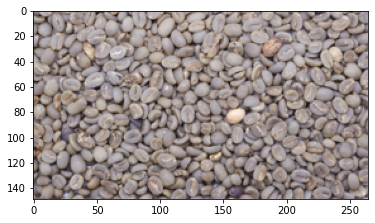

In [0]:
plt.imshow(image_list[20])

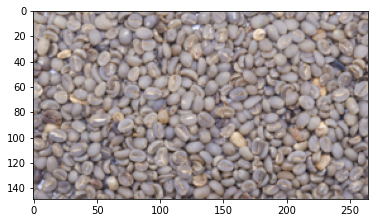

In [0]:
plt.imshow(image_list[200])

# Color Histogram

<function matplotlib.pyplot.show>

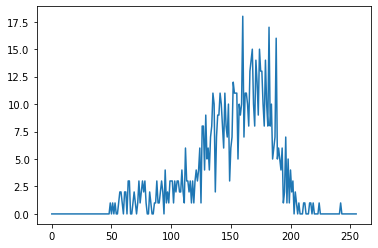

In [0]:
# coba histogram
histr = cv2.calcHist(arrayImages[200], [0], None, [256], [0,256])
plt.plot(histr)
plt.show

<function matplotlib.pyplot.show>

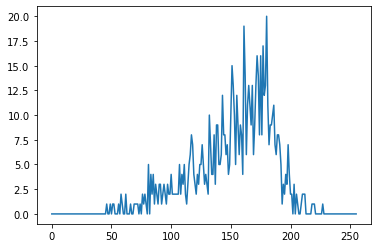

In [0]:
# coba histogram
histr = cv2.calcHist(arrayImages[200], [1], None, [256], [0,256])
plt.plot(histr)
plt.show

<function matplotlib.pyplot.show>

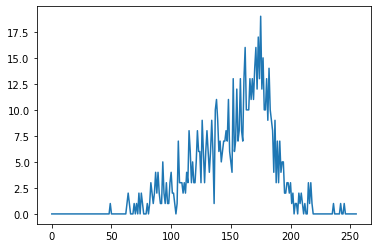

In [0]:
# coba histogram
histr = cv2.calcHist(arrayImages[200], [2], None, [256], [0,256])
plt.plot(histr)
plt.show

In [0]:
histr.shape

(256, 1)

In [0]:
hist, bin_edges = np.histogram(histr, density=True)

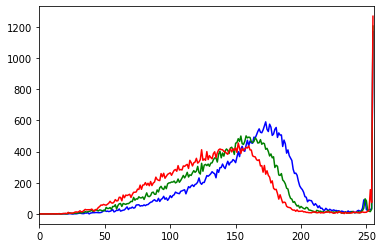

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([arrayImages[0]],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [0]:
def getColorHistogram(rgb_image, channel):
  colHist = cv2.calcHist(rgb_image, [channel], None, [256], [0,256])
  (hist, _) = np.histogram(colHist, bins=256)
  return hist, colHist

In [0]:
listColHist = [] #list Color Histogram
listImgHist = [] #list image Color Histogram
for image in arrayImages:
  chist_red, img = getColorHistogram(image, 0)
  chist_green, img = getColorHistogram(image, 1)
  chist_blue, img = getColorHistogram(image, 2)

  totalHist = np.concatenate((chist_red, chist_green))
  totalHist = np.concatenate((totalHist, chist_blue))

  listColHist.append((totalHist))
  listImgHist.append(img)
print("Jumlah Citra: ", len(listColHist))

Jumlah Citra:  540


In [0]:
256 * 3

768

In [0]:
np.array(listColHist).shape

(540, 768)

In [0]:
#nnti coba dlu pake satu gambar atau satu indeks ajah dlu

def getLBPimage(gray_image): #asalnya gray_image
  
  #input gray image = color image of shape(height, width)

  #output img: LBP converted image of the same shape as

  #step 0: step 0, Convert image to grayscall but already done
  #using the grayscalling = [] before the LBP

  #LBPimages = []
  
  #kalau img_gray gak bisa coba pakek image_list
  #grayscalling the image in index first
  grayscalling = cv2.cvtColor(gray_image, cv2.COLOR_BGR2GRAY)
  imgLBP = np.zeros_like(grayscalling)
  neighboor = 3 

  for imgHeight in range(0,gray_image.shape[0] - neighboor):
    for imgWidth in range(0,gray_image.shape[1] - neighboor):

      # Step1: 3 by 3 pixel
      # image_list = np.asarray(image_list)
      img           = grayscalling[imgHeight:imgHeight+neighboor, imgWidth:imgWidth+neighboor]
      center        = img[1,1]
      img01         = (img >= center)*1.0
      img01_vector  = img01.T.flatten() #make array become flat in one line (vector)

      # it is ok to order counterclock manner
      # img01_vector = img01.flatten()

      # Step 2: *Binary Operation
      img01_vector = np.delete(img01_vector,4)

      # Step 3 : Decimal: Convert the binary operated values to a digit
      where_img01_vector = np.where(img01_vector)[0]
      if len(where_img01_vector) >= 1:
        num = np.sum(2**where_img01_vector)
      else:
        num = 0
      imgLBP[imgHeight+1, imgWidth+1] = num
  
  return imgLBP



# LBP Using Library

In [0]:
from skimage.feature import local_binary_pattern
def getLBPimageScikit(gray_image):
  p = 8
  r = 1
  grayscalling = cv2.cvtColor(gray_image, cv2.COLOR_BGR2GRAY)
  lbp = local_binary_pattern(grayscalling, p, r, method = 'default')
  n_bins = int(lbp.max() + 1)
  (hist, _) = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density = True)
  return hist, lbp

In [0]:
listHistLBP = []
listImgLBP = []
for image in arrayImages:
    hist, img = getLBPimageScikit(image)
    listHistLBP.append((hist))
    listImgLBP.append(img)
print("Jumlah Citra: ", len(listHistLBP))

Jumlah Citra:  540


In [0]:
np.array(listHistLBP).shape

(540, 256)

In [0]:
np.array(listColHist).shape

(540, 768)

In [0]:
listFeature = np.concatenate((listHistLBP, listColHist), axis=1)

In [0]:
listFeature.shape

(540, 1024)

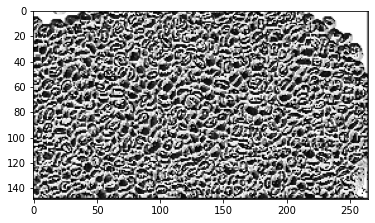

In [0]:
plt.imshow(listImgLBP[0], cmap="gray")

# Random Forrest Classifier

In [0]:
# coba satuin list histogram LBP sama Histogram Color
# imagesHist = listColHist, listHistLBP

### Only Using LBP Parameter

In [0]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  361
Jumlah data test:  179


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)


print("Akurasi", accuracy_score(y_test, y_pred))
coba data train
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.7932960893854749


### Try Only using Histogram Parameter

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listColHist, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  361
Jumlah data test:  179


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.4972067039106145


# KNN Classifier

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  361
Jumlah data test:  179


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_train,y_train))

Akurasi KNN = 0.9141274238227147


### parameter histogram

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listColHist, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  361
Jumlah data test:  179


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)


#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_train,y_train))

Akurasi KNN = 0.6149584487534626


# SVM Classifier

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  361
Jumlah data test:  179


In [0]:
from sklearn import svm
clf = svm.SVC(gamma="auto")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [0]:
from sklearn import metrics
print("Accuracy SVM: ", metrics.accuracy_score(y_test, y_pred))

Accuracy SVM:  0.3128491620111732


# ANN Classifier

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical, plot_model

In [0]:
input_shape = (256, )
num_classes = 3

model = Sequential([
  Dense(units=2048 , activation='relu', input_shape=input_shape),
  Dropout(0.5),
  Dense(units=1024, activation='relu'),
  Dropout(0.5),
  Dense(units=512, activation='relu'),
  Dropout(0.5),
  Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              526336    
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1

In [0]:
label[label == 3] = 0

label

# 0 1 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      1
1      1
2      1
3      1
4      1
      ..
535    0
536    0
537    0
538    0
539    0
Name: label, Length: 540, dtype: int64

In [0]:
y = to_categorical(label, num_classes=3)

In [0]:
print(y)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [0]:
listHistLBP_new = np.array(listHistLBP)
listHistLBP_new.shape

# 1 2 3 => dibaca 4 kelas karna mulai 0
# 0 1 2

(540, 256)

## ANN with LBP feature

In [0]:
X_train, X_test, y_train, y_test = train_test_split(listHistLBP_new, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=10000, validation_data=(X_test, y_test))

Output streaming akan dipotong hingga 5000 baris terakhir.
Epoch 3321/10000
12/12 [==============================] - 0s 37ms/step - loss: 1.0977 - accuracy: 0.3490 - val_loss: 1.1021 - val_accuracy: 0.3017
Epoch 3322/10000
12/12 [==============================] - 0s 37ms/step - loss: 1.0987 - accuracy: 0.3490 - val_loss: 1.1021 - val_accuracy: 0.3017
Epoch 3323/10000
12/12 [==============================] - 0s 38ms/step - loss: 1.0986 - accuracy: 0.3490 - val_loss: 1.1021 - val_accuracy: 0.3017
Epoch 3324/10000
12/12 [==============================] - 0s 37ms/step - loss: 1.0981 - accuracy: 0.3490 - val_loss: 1.1020 - val_accuracy: 0.3017
Epoch 3325/10000
12/12 [==============================] - 0s 37ms/step - loss: 1.0980 - accuracy: 0.3490 - val_loss: 1.1020 - val_accuracy: 0.3017
Epoch 3326/10000
12/12 [==============================] - 0s 38ms/step - loss: 1.0978 - accuracy: 0.3490 - val_loss: 1.1019 - val_accuracy: 0.3017
Epoch 3327/10000
12/12 [==============================] - 0

## ANN with Color Histogram and LBP (concatenate)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(listFeature, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=10000, validation_data=(X_test, y_test))